# Figure 1 

![title](../assets/Fig1.png)

In [18]:
%load_ext autoreload
%autoreload 2

import os
import sys
import logging
from pathlib import Path

logging.getLogger("matplotlib.font_manager").disabled = True

import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import matplotlib.patches as mpatches
from mycolorpy import colorlist as mcp
from common import *

sys.path.append('./prepare_data')

DATA_PATH = Path(
    "../data"
)
EXPORT_PATH = Path(
    "../results/Figure1"
)
EXPORT_PATH.mkdir(exist_ok=True, parents=True)

leg_angles = [
    'ThC_roll',
    'ThC_yaw',
    'ThC_pitch',
    'CTr_roll',
    'CTr_pitch',
    'FTi_pitch',
    'TiTa_pitch',
]

COLOR_LEGS = {
    'RF': COLORS['blue'],
    'LF': COLORS['vermillion'],
    'RAnt': COLORS['skyblue'],
    'LAnt': COLORS['orange'],
    "Neck": COLORS['pink'],
    "Bristles": COLORS['green'],
}

COLOR_ANGLES = {
    'Angle_head_roll': COLORS['green'],
    'Angle_head_pitch': COLORS['black'],
    'Angle_antenna_pitch_R': COLORS['skyblue'],
    'Angle_antenna_pitch_L': COLORS['orange'],
}

colors_piyg = mcp.gen_color(cmap="PiYG",n=5)

COLOR_BEHAVIORS = {
    "unilateral_t_left": colors_piyg[0],
    "unilateral_nt_left": colors_piyg[1],
    "bilateral": COLORS['grey'],
    "unilateral_nt_right": colors_piyg[3],
    "unilateral_t_right": colors_piyg[4],
    "nc_grooming": COLORS['skyblue'],
    "background": COLORS['yellow'],
}

FIGSIZE = {'width': 1.2, 'length': 0.9}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Panel B

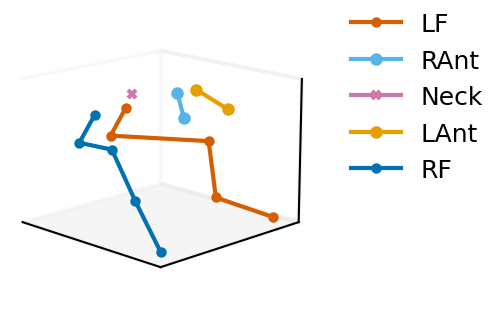

In [2]:
panelb_data = np.load(DATA_PATH / "Fig1_panelB.npy")

KEY_POINTS_DICT = {
    "LF": (np.arange(0, 5), "solid"),
    "RAnt": (np.arange(12, 14), "o"),
    "Neck": (np.arange(14, 15), "x"),
    "LAnt": (np.arange(10, 12), "o"),
    "RF": (np.arange(5, 10), "solid"),
}

with plt.style.context("./config.mplstyle"):

    fig = plt.figure(figsize=(FIGSIZE["width"] * 1.1, FIGSIZE["width"] * 1.5), dpi=300)

    ax3d = fig.add_subplot(projection="3d")
    ax3d.view_init(azim=-45, elev=15)

    # First remove fill
    ax3d.xaxis.pane.fill = False
    ax3d.yaxis.pane.fill = False
    ax3d.zaxis.pane.fill = True

    t = 1100

    for kp, (order, ls) in KEY_POINTS_DICT.items():
        color = COLOR_LEGS[kp]

        if len(order) > 3:
            ax3d.plot(
                panelb_data[t, order, 0],
                panelb_data[t, order, 1],
                panelb_data[t, order, 2],
                label=kp,
                linestyle=ls,
                linewidth=1,
                color=color,
                marker=".",
            )
        else:
            ax3d.plot(
                panelb_data[t, order, 0],
                panelb_data[t, order, 1],
                panelb_data[t, order, 2],
                label=kp,
                linewidth=1,
                marker=ls,
                markersize=2,
                color=color,
            )

    # remove ticks
    ax3d.set_xticks([])
    ax3d.set_yticks([])
    ax3d.set_zticks([])

    plt.legend(bbox_to_anchor=(1.1, 1), borderaxespad=0.0, frameon=False)

    fig.savefig(EXPORT_PATH / "Fig1_panelB.png", bbox_inches="tight")
    plt.show()

## Panel B

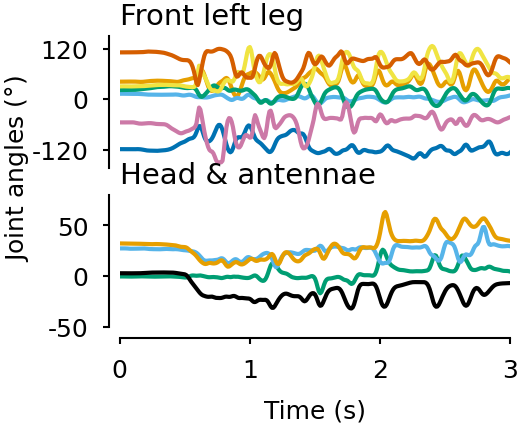

In [3]:
panelc_data = load_data(DATA_PATH / "Fig1_panelC.pkl")

with plt.style.context("./config.mplstyle"):
    fig, axs = plt.subplots(
        2,
        1,
        figsize=(FIGSIZE["width"] * 1.4, FIGSIZE["length"] * 1.4),
        sharex=False,
        sharey=False,
        dpi=300,
    )

    # inverse the sign
    for angle_inv in [
        "Angle_head_pitch",
        "Angle_antenna_pitch_R",
        "Angle_antenna_pitch_L",
    ]:
        panelc_data[angle_inv] = -1 * panelc_data[angle_inv]

    for angle in leg_angles:
        axs[0].plot(
            panelc_data["Time"],
            panelc_data[f"Angle_LF_{angle}"],
            lw=1,
            label=angle.replace("_", " "),
        )

    # spine off
    axs[0].spines["bottom"].set_visible(False)
    axs[0].set_xticks([])

    for angle, color in COLOR_ANGLES.items():
        axs[1].plot(
            panelc_data["Time"],
            panelc_data[angle],
            label=angle.replace("Angle", "").replace("_", " "),
            lw=1,
            color=color,
        )

    axs[0].set_yticks([-120, 0, 120], labels=[-120, 0, 120])
    axs[1].set_yticks([-50, 0, 50], labels=[-50, 0, 50])
    axs[1].set_xticks([2, 3, 4, 5], labels=[0, 1, 2, 3])
    axs[1].set_xlabel("Time (s)")

    plt.ylabel("Joint angles ($\degree$)", y=1.2)
    # align to the left
    axs[0].set_title("Front left leg", loc="left", y=0.9)
    axs[1].set_title("Head & antennae", loc="left", y=0.9)

    for i in range(2):
        axs[i].set_xlim(2, 5)
        axs[i].spines["left"].set_position(("outward", 2.5))
        axs[i].spines["bottom"].set_position(("outward", 2.5))

    # plt.tight_layout()
    fig.savefig(EXPORT_PATH / "Fig1_panelC.png", bbox_inches="tight")
    plt.show()

## Panel F

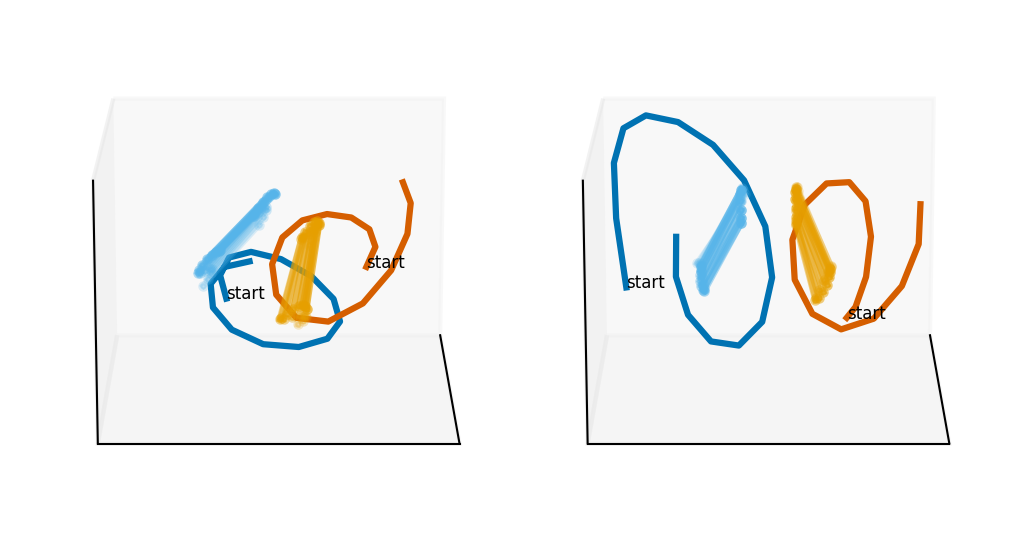

In [4]:
panelf_data = load_data(DATA_PATH / "Fig1_panelF-G.pkl")

behavior_intervals = {
    "unilateral_left": (4961, 4976),
    "bilateral": (270, 285),
}

with plt.style.context("config.mplstyle"):

    fig, axs = plt.subplots(
        1,
        2,
        figsize=(FIGSIZE["width"] * 2.8, FIGSIZE["width"] * 0.6),
        subplot_kw=dict(projection="3d"),
    )

    for i, (behavior, behavior_kinematics) in enumerate(panelf_data.items()):
        for side in ["R", "L"]:
            if i == 2:
                label_antenna = f"{side} Antenna"
                label_leg = f"{side} Tibia-Tarsus"
            else:
                label_antenna = ""
                label_leg = ""

            start = behavior_intervals[behavior][0]
            end = behavior_intervals[behavior][1]

            axs[i].plot(
                behavior_kinematics.loc[start:end, [f"Pose_{side}F_Tarsus_x"]],
                behavior_kinematics.loc[start:end, [f"Pose_{side}F_Tarsus_y"]],
                behavior_kinematics.loc[start:end, [f"Pose_{side}F_Tarsus_z"]],
                color=COLOR_LEGS[f"{side}F"],
                alpha=1,
                lw=1.5,
                markersize=3,
                # marker=".",
                label=label_leg,
            )
            # mark start and end with a text
            axs[i].text(
                behavior_kinematics.loc[start, f"Pose_{side}F_Tarsus_x"],
                behavior_kinematics.loc[start, f"Pose_{side}F_Tarsus_y"],
                behavior_kinematics.loc[start, f"Pose_{side}F_Tarsus_z"],
                "start",
                fontsize=4,
                color="black",
            )

            for t in range(start, end):
                # scale transparancy with time
                alpha = 0.2 + 0.5 * (t - start) / (end - start)
                axs[i].plot(
                    (
                        behavior_kinematics.loc[
                            t, [f"Pose_{side}_head_Antenna_base_x"]
                        ],
                        behavior_kinematics.loc[
                            t, [f"Pose_{side}_head_Antenna_edge_x"]
                        ],
                    ),
                    (
                        behavior_kinematics.loc[
                            t, [f"Pose_{side}_head_Antenna_base_y"]
                        ],
                        behavior_kinematics.loc[
                            t, [f"Pose_{side}_head_Antenna_edge_y"]
                        ],
                    ),
                    zs=(
                        behavior_kinematics.loc[
                            t, [f"Pose_{side}_head_Antenna_base_z"]
                        ],
                        behavior_kinematics.loc[
                            t, [f"Pose_{side}_head_Antenna_edge_z"]
                        ],
                    ),
                    color=COLOR_LEGS[f"{side}Ant"],
                    marker=".",
                    alpha=alpha,
                    lw=1.5,
                )

    for i in range(2):
        axs[i].view_init(azim=0, elev=16)
        # no ticks and grids
        axs[i].grid(False)
        axs[i].set_xlim(0.8, 1.4)
        axs[i].set_ylim(-0.6, 0.6)
        axs[i].set_zlim(0.7, 1.5)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_zticks([])

    plt.tight_layout(pad=-5.5)

    fig.savefig(EXPORT_PATH / "Fig1_panelF.png", dpi=300, bbox_inches="tight")
    plt.show()

## Panels G, H

Angle_head_roll
Angle_head_pitch
Angle_antenna_pitch_R
Angle_antenna_pitch_L


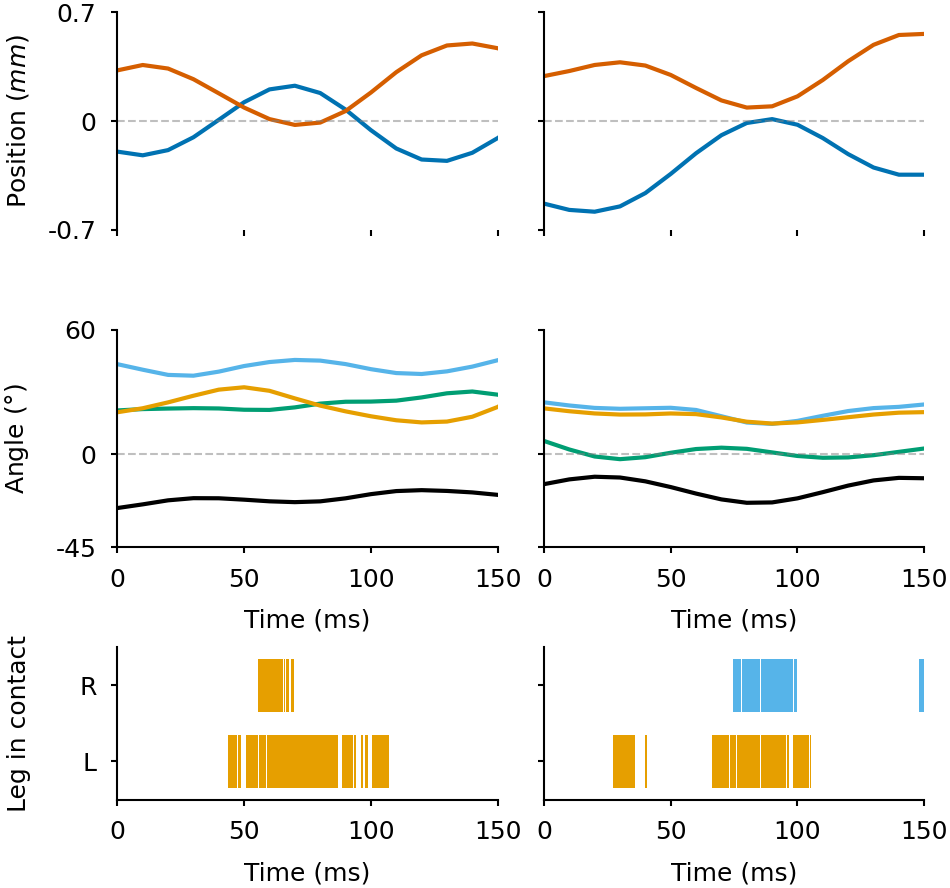

In [10]:
panelf_data = load_data(DATA_PATH / "Fig1_panelF-G.pkl")
panelh_data = load_data(DATA_PATH / "Fig1_panelH.pkl")

time = np.arange(0, 150, 10)  # 500 ms with 10 ms time step

with plt.style.context("config.mplstyle"):

    fig, axs = plt.subplots(
        3,
        2,
        figsize=(FIGSIZE["width"] * 2.8, FIGSIZE["length"] * 3.5),
        sharex=False,
        sharey=False,
        dpi=300,
        height_ratios=[1, 1, 0.7],
    )

    for i, (behavior, behavior_kinematics) in enumerate(panelf_data.items()):
        for leg in ["RF", "LF"]:
            axs[0, i].plot(
                # time,
                behavior_kinematics[f"Pose_{leg}_Tarsus_y"].to_numpy(),
                color=COLOR_LEGS[leg],
                linewidth=1,
            )
        axs[0, i].set_ylim(-0.7, 0.7)
        axs[0, i].spines["bottom"].set_visible(False)

    axs[0, 0].set_yticks([-0.7, 0, 0.7], labels=[-0.7, 0, 0.7])
    axs[0, 1].set_yticks([-0.7, 0, 0.7], labels=[])

    for angle_name, color in COLOR_ANGLES.items():
        print(angle_name)
        for i, (behavior, behavior_kinematics) in enumerate(panelf_data.items()):
            # inverse the sign
            if angle_name in [
                "Angle_head_pitch",
                "Angle_head_roll",
                "Angle_antenna_pitch_R",
                "Angle_antenna_pitch_L",
            ]:
                behavior_kinematics[angle_name] = -1 * behavior_kinematics[angle_name]

            axs[1, i].plot(
                # time,
                behavior_kinematics[angle_name].to_numpy(),
                color=color,
                lw=1,
            )
            # bottom spine off
            axs[1, i].set_ylim(-45, 60)
            # axs[1, i].spines["bottom"].set_visible(False)

    axs[1, 0].set_yticks([-45, 0, 60], labels=[-45, 0, 60])
    axs[1, 1].set_yticks([-45, 0, 60], labels=[])

    plot_legs_collision_diagram_grooming(
        panelh_data["unil_contact_data"],
        panelh_data["unil_col_pairs"],
        ax=axs[2, 0],
        alpha=1.0,
        time_step=panelh_data["time_step"],
    )
    axs[2, 0].set_yticks([0, 1], labels=[])

    plot_legs_collision_diagram_grooming(
        panelh_data["bilat_contact_data"],
        panelh_data["bilat_col_pairs"],
        ax=axs[2, 1],
        alpha=1.0,
        time_step=panelh_data["time_step"],
    )

    axs[2, 0].set_yticks([0, 1], labels=["R", "L"])
    axs[2, 1].set_yticks([0, 1], labels=[])

    for i in range(2):
        # hline at 0
        axs[i, 0].axhline(0, color="grey", linestyle="--", alpha=0.5)
        axs[i, 1].axhline(0, color="grey", linestyle="--", alpha=0.5)
        axs[1, i].set_xlabel("Time (ms)")
        axs[2, i].set_xlabel("Time (ms)")

    # labels
    axs[0, 0].set_ylabel("Position ($mm$)")
    axs[1, 0].set_ylabel("Angle ($\degree$)")
    axs[2, 0].set_ylabel("Leg in contact")

    # axs[2,0].set_xlim()
    for i in range(3):
        axs[i, 0].set_xlim(22, 37)
        axs[i, 1].set_xlim(70, 85)

    axs[0, 0].set_xticks([22, 27, 32, 37], labels=[])
    axs[1, 0].set_xticks([22, 27, 32, 37], labels=[0, 50, 100, 150])
    axs[2, 0].set_xticks([22, 27, 32, 37], labels=[0, 50, 100, 150])

    axs[0, 1].set_xticks([70, 75, 80, 85], labels=[])
    axs[1, 1].set_xticks([70, 75, 80, 85], labels=[0, 50, 100, 150])
    axs[2, 1].set_xticks([70, 75, 80, 85], labels=[0, 50, 100, 150])

    fig.align_ylabels()
    plt.tight_layout(w_pad=0.5, h_pad=0.5)

    # save
    plt.savefig(EXPORT_PATH / "Fig1_panelsG-H.png", dpi=300, bbox_inches="tight")
    plt.show()

## Panels I, J

/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97201/670479965.py:39: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'grey'}` instead.

  sns.barplot(
/Users/ozdil/anaconda3/envs/ntw_model/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ozdil/anaconda3/envs/ntw_model/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ozdil/anaconda3/envs/ntw_model/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


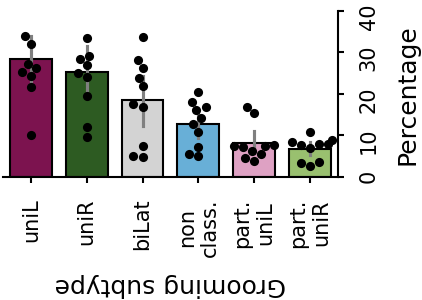

In [11]:
panelsIK_data = load_data(DATA_PATH / "Fig1_panelI-K.pkl")
# Find the total occurance number of each behavioral subtype
grouped_df = panelsIK_data.groupby(by=["Fly", "Date"])[
    [
        "bilateral",
        "nc_grooming",
        "unilateral_nt_left",
        "unilateral_nt_right",
        "unilateral_t_left",
        "unilateral_t_right",
    ]
].sum()

# Find the percentage of a behavioral subtype among all behaviors
grouped_df_percentage = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100
# order the bars based on the values
order_list = [
    "unilateral_t_left",
    "unilateral_t_right",
    "bilateral",
    "nc_grooming",
    "unilateral_nt_left",
    "unilateral_nt_right",
]

x_label_list = [
    "uniL",
    "uniR",
    "biLat",
    "non\nclass.",
    "part.\nuniL",
    "part.\nuniR",
]

with plt.style.context("./config.mplstyle"):

    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 1.2, FIGSIZE["length"] * 0.8))

    sns.barplot(
        data=grouped_df_percentage,
        errcolor="grey",
        palette=COLOR_BEHAVIORS,
        n_boot=5000,
        order=order_list,
        edgecolor="black",
        linewidth=0.5,
        width=0.75,
    )

    sns.swarmplot(
        data=grouped_df_percentage,
        color="black",
        size=2.2,
        order=order_list,
        alpha=1,
    )

    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    # spine
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(True)

    plt.xticks(
        rotation=90, ticks=range(len(x_label_list)), labels=x_label_list, fontsize=5
    )
    plt.yticks(
        rotation=90, fontsize=5, ticks=[0, 10, 20, 30, 40], labels=[0, 10, 20, 30, 40]
    )
    plt.xlabel("Grooming subtype", rotation=180)
    plt.ylabel("Percentage")
    plt.ylim((0, 40))

    fig.savefig(EXPORT_PATH / "Fig1_panelI.png")

    plt.show()

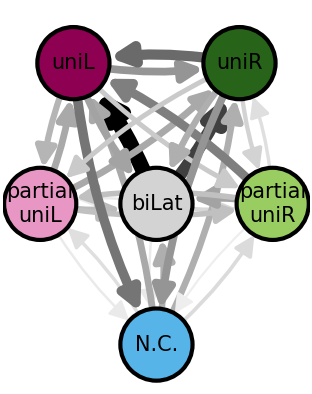

In [12]:
# create lagged versions of dataframe
df_lag1 = panelsIK_data.shift(1)

# create transition dataframe
df_transition = pd.DataFrame(
    {
        "from_state": df_lag1["beh_label"],  # past
        "to_state": panelsIK_data["beh_label"],  # future
        "index_diff": panelsIK_data["Frame"] - df_lag1["Frame"],
        "count": 1,
    }
).dropna()

df_transition_w_cont = df_transition[
    df_transition.index_diff == 1
]  # only keep consecutive transitions

df_transition_w_cont = (
    df_transition_w_cont.groupby(["from_state", "to_state"]).sum().reset_index()
)


pos = {
    "unilateral_t_left": (0, 3),
    "unilateral_nt_left": (-1, 2),
    "nc_grooming": (2.5, 1),
    "bilateral": (2.5, 2),
    "unilateral_nt_right": (6, 2),
    "unilateral_t_right": (5, 3),
}

node_labels = {
    "bilateral": "biLat",
    "nc_grooming": "N.C.",
    "unilateral_nt_left": "partial\nuniL",
    "unilateral_nt_right": "partial\nuniR",
    "unilateral_t_left": "uniL",
    "unilateral_t_right": "uniR",
}

with plt.style.context("./config.mplstyle"):

    fig, ax = plt.subplots(
        figsize=(FIGSIZE["width"] * 1.1, FIGSIZE["width"] * 1.4), dpi=300
    )

    # create directed graph from transition dataframe
    G = nx.MultiDiGraph()
    for index, row in df_transition_w_cont.iterrows():
        # ignore self-loops
        if row["from_state"] == row["to_state"]:
            continue
        G.add_edge(row["from_state"], row["to_state"], weight=row["count"])

    # normalize the weights
    weights = np.array([d["weight"] for u, v, d in G.edges(data=True)])
    weights_factor = (1 / np.sum(weights)) * 45
    edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    # get colors scaled based on the edge weights using Greys color map
    edge_colors = plt.cm.Greys(weights / weights.max())
    # RGBA to HEX
    edge_colors = [mpl.colors.to_hex(c) for c in edge_colors]

    # create graph layout and draw nodes, edges, and labels
    nx.draw_networkx_nodes(
        G,
        pos,
        node_size=300,
        edgecolors="black",
        node_color=[COLOR_BEHAVIORS[beh] for beh in G.nodes()],
    )

    nx.draw_networkx_edges(
        G,
        pos,
        width=[d["weight"] * weights_factor for u, v, d in G.edges(data=True)],
        arrows=True,
        edge_color=edge_colors,
        connectionstyle="arc3,rad=0.1",
        alpha=1,
    )
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=5, font_color="black")
    # display graph
    plt.axis("off")
    ax.margins(0.1)

    fig.savefig(EXPORT_PATH / "Fig1_panelJ.png")

    plt.show()

## EDFig 1 panel F

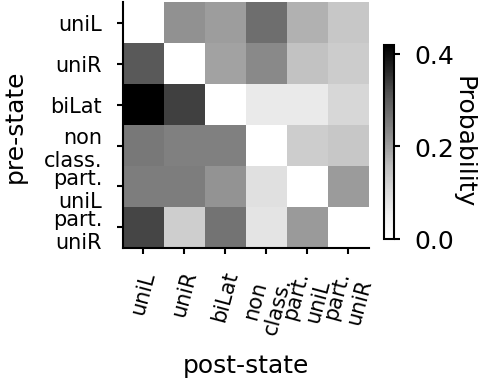

In [13]:
# divide each row by the sum of the row

matrix_representation = nx.adjacency_matrix(G, weight="weight", nodelist=order_list)
adj_matrix = matrix_representation.todense()
adj_normalized_row = np.divide(adj_matrix, np.sum(adj_matrix, axis=1)[:, np.newaxis])

# Panel C - II
with plt.style.context("./config.mplstyle"):

    fig, ax = plt.subplots(
        figsize=(FIGSIZE["width"] * 1.1, FIGSIZE["width"] * 1.0), dpi=300
    )
    neg = ax.imshow(
        adj_normalized_row, cmap="Greys", vmin=0, vmax=adj_normalized_row.max()
    )

    ax.set_xticks(
        ticks=range(len(x_label_list)), labels=x_label_list, rotation=75, fontsize=5
    )
    ax.set_yticks(
        ticks=range(len(x_label_list)), labels=x_label_list, rotation=0, fontsize=5
    )

    cbar = fig.colorbar(neg, ax=ax, anchor=(0, 0.3), shrink=0.7)
    cbar.set_label("Probability", rotation=270, labelpad=5)

    plt.xlabel("post-state")
    plt.ylabel("pre-state")

    fig.savefig(
        EXPORT_PATH / "EDFig1_panelE.png",
        dpi=300,
        bbox_inches="tight",
    )

    plt.show()

## Panels K-M

In [14]:
from prepare_data import Fig1_prepare_data
from sklearn.decomposition import PCA

kinematics_df = load_data(DATA_PATH / "Fig1_panelK-M.pkl")
pca_data3d, pca_data, pca_data_labels, selected_keypoints = Fig1_prepare_data.prepare_pca_data(
    kinematics_df
)
pca = PCA(n_components=5)
pca_embedding = pca.fit_transform(pca_data)

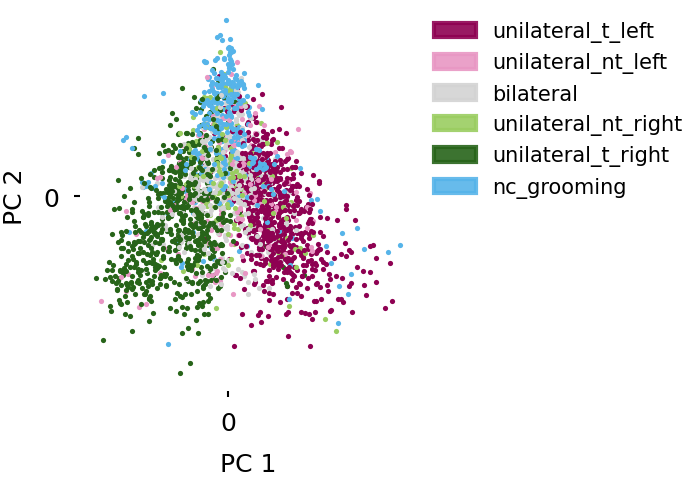

In [15]:
with plt.style.context("./config.mplstyle"):

    fig, ax = plt.subplots(figsize=(FIGSIZE["width"] * 1.2, FIGSIZE["width"] * 1.4))

    for t in range(pca_embedding.shape[0]):
        ax.plot(
            pca_embedding[t, 0],
            pca_embedding[t, 1],
            alpha=1,
            marker="o",
            markersize=1.25,
            markeredgewidth=0.0,
            markerfacecolor=COLOR_BEHAVIORS[pca_data_labels[t]],
        )

    ax_handles, ax_labels = ax.get_legend_handles_labels()
    ax_handles += [
        mpatches.Patch(color=color, alpha=0.9)
        for name, color in COLOR_BEHAVIORS.items()
        if name != "background"
    ]
    ax_labels += [
        name for name, color in COLOR_BEHAVIORS.items() if name != "background"
    ]

    ax.legend(
        ax_handles,
        ax_labels,
        loc="upper left",
        bbox_to_anchor=(1, 1),
        frameon=False,
        fontsize=5,
    )

    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")

    # set ax ticks
    ax.set_xticks([0])
    ax.set_yticks([0])

    # spines invisible
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    fig.savefig(EXPORT_PATH / f"Fig1_panelK.png", dpi=300, bbox_inches="tight")

    plt.show()

## EDFig 1 panel F

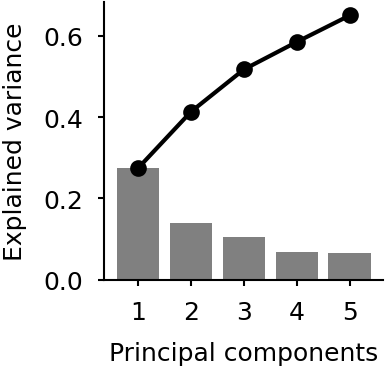

In [16]:
with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(1, 1, figsize=(FIGSIZE["width"] * 1, FIGSIZE["width"] * 1.0))

    # PCA explained variance
    ax.plot(
        np.arange(0, 5),
        np.cumsum(pca.explained_variance_ratio_),
        marker="o",
        color="black",
        lw=1,
    )
    ax.bar(np.arange(0, 5), pca.explained_variance_ratio_, color="grey")
    ax.set_xticks(np.arange(0, 5), labels=np.arange(1, 6))
    ax.set_yticks(np.arange(0, 0.8, 0.2))
    ax.set_xlabel("Principal components")
    ax.set_ylabel("Explained variance")

    fig.savefig(
        EXPORT_PATH / f"EDFig_panelF.png", dpi=300, bbox_inches="tight"
    )
    plt.show()

<Figure size 936x540 with 0 Axes>

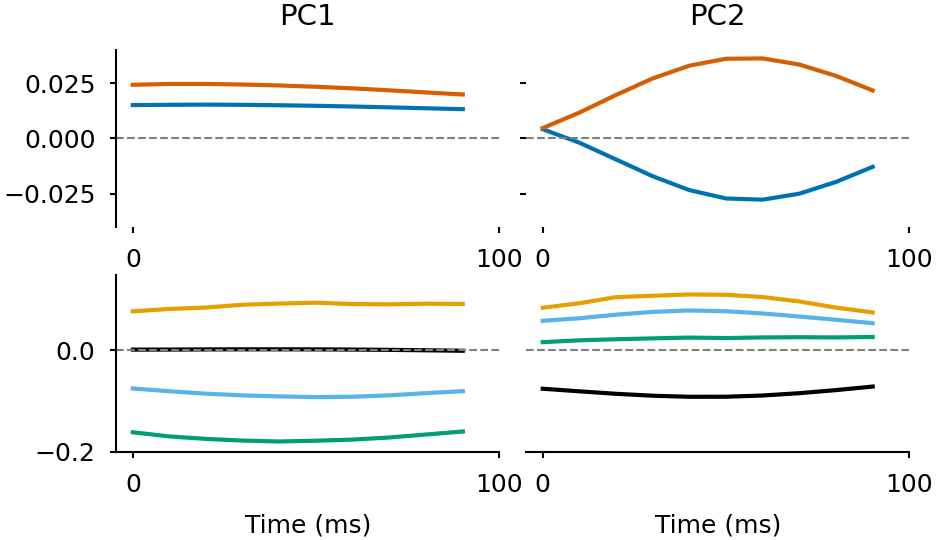

In [19]:
with plt.style.context("./config.mplstyle"):
    # gridspec inside gridspec
    fig = plt.figure(figsize=(FIGSIZE["width"] * 2.6, FIGSIZE["width"] * 1.5))

    grid_spec = gridspec.GridSpec(2, 2, figure=fig)

    # exp_var = fig.add_subplot(grid_spec[:, 0])
    pc1_leg = fig.add_subplot(grid_spec[0, 0])
    pc2_leg = fig.add_subplot(grid_spec[0, 1])

    pc1_head = fig.add_subplot(grid_spec[1, 0], sharex=pc1_leg)
    pc2_head = fig.add_subplot(grid_spec[1, 1], sharex=pc2_leg)

    # principal components
    chunk_length = 10
    variable_no = len(selected_keypoints)
    pc1 = pca.components_[0].reshape(chunk_length, variable_no)
    pc2 = pca.components_[1].reshape(chunk_length, variable_no)

    # PC1 vs PC2 for legs
    tita_right = selected_keypoints.index("Pose_RF_Tarsus_y")
    tita_left = selected_keypoints.index("Pose_LF_Tarsus_y")

    pc1_leg.plot(pc1[:, tita_right], color=COLOR_LEGS["RF"], label="RF", lw=1)
    pc1_leg.plot(pc1[:, tita_left], color=COLOR_LEGS["LF"], label="LF", lw=1)
    pc2_leg.plot(pc2[:, tita_right], color=COLOR_LEGS["RF"], label="RF", lw=1)
    pc2_leg.plot(pc2[:, tita_left], color=COLOR_LEGS["LF"], label="LF", lw=1)

    # hline y=0
    pc1_leg.axhline(0, color="grey", linestyle="--")
    pc2_leg.axhline(0, color="grey", linestyle="--")

    # PC1 and PC2 for head
    head_pitch = selected_keypoints.index("Angle_head_pitch")
    head_roll = selected_keypoints.index("Angle_head_roll")
    antenna_pitch_L = selected_keypoints.index("Angle_antenna_pitch_L")
    antenna_pitch_R = selected_keypoints.index("Angle_antenna_pitch_R")

    pc1_head.plot(
        pc1[:, head_pitch],
        color=COLOR_ANGLES["Angle_head_pitch"],
        label="Head pitch",
        lw=1,
    )
    pc1_head.plot(
        pc1[:, head_roll],
        color=COLOR_ANGLES["Angle_head_roll"],
        label="Head roll",
        lw=1,
    )
    pc1_head.plot(
        pc1[:, antenna_pitch_L],
        color=COLOR_ANGLES["Angle_antenna_pitch_L"],
        label="Antenna pitch L",
        lw=1,
    )
    pc1_head.plot(
        pc1[:, antenna_pitch_R],
        color=COLOR_ANGLES["Angle_antenna_pitch_R"],
        label="Antenna pitch R",
        lw=1,
    )

    pc2_head.plot(
        pc2[:, head_pitch],
        color=COLOR_ANGLES["Angle_head_pitch"],
        label="Head pitch",
        lw=1,
    )
    pc2_head.plot(
        pc2[:, head_roll],
        color=COLOR_ANGLES["Angle_head_roll"],
        label="Head roll",
        lw=1,
    )
    pc2_head.plot(
        pc2[:, antenna_pitch_L],
        color=COLOR_ANGLES["Angle_antenna_pitch_L"],
        label="Antenna pitch L",
        lw=1,
    )
    pc2_head.plot(
        pc2[:, antenna_pitch_R],
        color=COLOR_ANGLES["Angle_antenna_pitch_R"],
        label="Antenna pitch R",
        lw=1,
    )

    # hline y=0
    pc1_head.axhline(0, color="grey", linestyle="--")
    pc2_head.axhline(0, color="grey", linestyle="--")

    # ylims
    pc1_leg.set_ylim(-0.04, 0.04)
    pc2_leg.set_ylim(-0.04, 0.04)

    pc1_head.set_ylim(-0.2, 0.15)
    pc2_head.set_ylim(-0.2, 0.15)

    pc1_leg.spines["bottom"].set_visible(False)
    pc2_leg.spines["bottom"].set_visible(False)
    pc2_leg.spines["left"].set_visible(False)
    pc2_head.spines["left"].set_visible(False)

    pc1_leg.set_xticklabels([])
    pc2_leg.set_yticklabels([])
    pc2_leg.set_xticklabels([])

    pc1_head.set_xticks([0, 10], labels=[0, 100])
    pc2_head.set_xticks([0, 10], labels=[0, 100])
    pc2_head.set_yticks([])

    pc1_head.set_xlabel("Time (ms)")
    pc2_head.set_xlabel("Time (ms)")

    pc1_leg.set_title("PC1")
    pc2_leg.set_title("PC2")

    plt.tight_layout(pad=0.1)
    fig.savefig(
        EXPORT_PATH / f"Fig1_panelsL-M.png", dpi=300, bbox_inches="tight"
    )

    plt.show()